In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions_anisotropy import *

### Estimate propagation direction of a single incoming wave

author: Sebastian Noe, snoe@geophysik.uni-muenchen.de

$
\ddot u_x = -A\omega^2n_x\exp(i\omega(t-\frac{x\cdot\nu}{v}))
$

$
\ddot u_y = -A\omega^2n_y\exp(i\omega(t-\frac{x\cdot\nu}{v}))
$

$
\ddot u_z = -A\omega^2n_z\exp(i\omega(t-\frac{x\cdot\nu}{v}))
$

$
\dot\Omega_x = -\frac{A\omega^2}{2v}(\nu_yn_z-\nu_zn_y)\exp(i\omega(t-\frac{x\cdot\nu}{v}))
$

$
\dot\Omega_y = -\frac{A\omega^2}{2v}(\nu_zn_x-\nu_xn_z)\exp(i\omega(t-\frac{x\cdot\nu}{v}))
$

$
\dot\Omega_z = -\frac{A\omega^2}{2v}(\nu_xn_y-\nu_yn_x)\exp(i\omega(t-\frac{x\cdot\nu}{v}))
$

$
\dot\epsilon_{zz} = -\frac{A\omega^2}{v}\nu_zn_z\exp(i\omega(t-\frac{x\cdot\nu}{v}))
$




#### Using 7C seismometer

Translational measurements are used to determine the polarization vector $n$.
Ratios of rotational components and the horizontal deformation are formed to extract the propagation direction. These ratios have the advantage of eliminating the unknown phase-velocity $v$.

$
\frac{\dot\Omega_y}{\dot\epsilon_{zz}} = \frac{1}{2}\frac{\nu_zn_x-\nu_xn_z}{\nu_zn_z} = \frac{1}{2}(\frac{n_x}{n_z}-\frac{\nu_x}{\nu_z})
$

$
\frac{\dot\Omega_x}{\dot\epsilon_{zz}} = \frac{1}{2}\frac{\nu_yn_z-\nu_zn_y}{\nu_zn_z} = \frac{1}{2}(\frac{\nu_y}{\nu_z}-\frac{n_y}{n_z})
$

Assuming (before normalization) $\nu_z=1$, we see

$
\nu = \begin{pmatrix}- \frac{2\dot\Omega_y}{\dot\epsilon_{zz}}+ \frac{n_x}{n_z}\\ \frac{2\dot\Omega_x}{\dot\epsilon_{zz}} + \frac{n_y}{n_z}  \\ 1 \end{pmatrix}
$

This works for all wavetypes (qP, qS1, qS2) of all symmetries. Some directions may not be resolvable, including purely horizontal propagating waves or purely horizontal polarized waves. 

The latter is the case for SH-waves in VTI-media. 
The problem is that the polarization is purely horizontal, i.e. the vertical strain is zero. One could try to form ratios between rotational components: 

$\dot\Omega_y / \dot\Omega_x = n_x/n_y$ 

$\dot\Omega_z / \dot\Omega_y = \frac{\nu_x}{\nu_z}\frac{n_y}{n_x}-\frac{\nu_y}{\nu_z}$

$\dot\Omega_z / \dot\Omega_x = \frac{\nu_y}{\nu_x}\frac{n_x}{n_y}-\frac{\nu_x}{\nu_z}$

The first equation doesn't contain any new information and the other two can be transformed to (assuming $\nu_z=1$, before normalization):

$
\begin{pmatrix}\dot\Omega_z / \dot\Omega_y \\ \dot\Omega_z / \dot\Omega_x \end{pmatrix} = \begin{pmatrix} \frac{n_y}{n_x} & -1 \\ -1 & \frac{n_x}{n_y} \end{pmatrix} \begin{pmatrix} \nu_x\\\nu_y \end{pmatrix}
$

The matrix's determinant is 0. Hence, the system cannot be uniquely solved and the propagation direction cannot be determined. 

With the same reasoning, one can show that one needs the seventh-component (vertical strain) in order to determine propagation direction for single wavefronts.

Having the full translational and rotational measurements, one can always find a rotation for the seismometer such that $n_z=0$. The resulting rotational ratios follow above's derivation, leading to the same singular matrix. Not forming ratios is also not an option as the cross-product operator is not invertible.

In [2]:
def get_seis_one_wavetype(mode,v,vel,nu,f,fs):
    
    l1 = np.argmax(vel)
    l3 = np.argmin(vel)
    for i in range(0,3):
        if l1!=i and l3!=i:
            l2 = i
    if mode=='qP':
        vel_0 = vel[l1]
        v_0 = v[:,l1]
    elif mode=='qS1':
        vel_0 = vel[l2]
        v_0 = v[:,l2]
    elif mode=='qS2':
        vel_0 = vel[l3]
        v_0 = v[:,l3]
    
    xr = max(vel)*5.
    tmin = xr / max(vel) * 0.3
    tmax = xr / min(vel) * 1.3
    nt = int(((tmax-tmin) * fs)+1) 
    t = np.linspace(tmin,tmax,nt)
    seis = np.zeros((7,nt))   
    A = 1
    omega = 2*np.pi*f
    vel = vel_0
    v = v_0
    
    seis[0,:] = - v[0]*A*omega**2*(t-xr/vel)*np.exp(-(f**2)*(t-xr/vel)**2) 
    seis[1,:] = - v[1]*A*omega**2*(t-xr/vel)*np.exp(-(f**2)*(t-xr/vel)**2)
    seis[2,:] = - v[2]*A*omega**2*(t-xr/vel)*np.exp(-(f**2)*(t-xr/vel)**2)
     
    
    seis[3,:] =- np.cross(nu,v)[0]*A*omega**2/(2*vel)*(t-xr/vel)*np.exp(-(f**2)*(t-xr/vel)**2)
    seis[4,:] =- np.cross(nu,v)[1]*A*omega**2/(2*vel)*(t-xr/vel)*np.exp(-(f**2)*(t-xr/vel)**2)
    seis[5,:] =- np.cross(nu,v)[2]*A*omega**2/(2*vel)*(t-xr/vel)*np.exp(-(f**2)*(t-xr/vel)**2)
    
    seis[6,:] = - A * omega**2/vel*v[2]*nu[2]*(t-xr/vel)*np.exp(-(f**2)*(t-xr/vel)**2) 
    
    return seis, t

In [3]:
def plot_7C(seis,t):
    a1 = abs(seis[0:3][:].max())
    plt.figure(figsize=(8,4))
    plt.title('Translation')
    
    plt.plot(t,seis[0,:],label='x')
    plt.plot(t,seis[1,:]-a1,label='y')
    plt.plot(t,seis[2,:]-2*a1,label='z')
    plt.legend()
    plt.yticks([])
    plt.show()
    a2 = seis[3:6][:].max()
    plt.figure(figsize=(8,4))
    plt.title('Rotation')
    plt.plot(t,seis[3,:],label='rot_x')
    plt.plot(t,seis[4,:]-a2,label='rot_y')
    plt.plot(t,seis[5,:]-2*a2,label='rot_z')
    plt.legend()
    plt.yticks([])
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.title('Strain')
    plt.plot(t,seis[6,:],color='green',label='strain_zz')
    plt.legend()
    plt.yticks([])
    plt.show()
    

In [4]:
medium = load_medium_list()
print(' ')
random_medium = load_random_medium_list()

#0 isotropic
#1 taylor sandstone
#2 mesaverde clayshale
#3 mesaverde laminated siltstone
#4 mesaverde mudshale
#5 mesaverde calcareous sandstone
#6 quartz
#7 Baird-shale
 
 
#0 isotropic
#1 cubic
#2 VTI
#3 tetragonal
#4 trigonal
#5 orthorhombic
#6 monoclinic
#7 triclinic


In [5]:
index = 7
#C, density = get_specific_VTI(medium[index])
C, density = get_random_C(random_medium[index],30)

triclinic
[[385.026 391.764 217.854 103.852 103.362  81.155]
 [391.764 481.908 306.78   99.343 102.089 119.851]
 [217.854 306.78  840.966 139.519 106.064  80.947]
 [103.852  99.343 139.519 243.5    64.414 110.307]
 [103.362 102.089 106.064  64.414 101.272  88.994]
 [ 81.155 119.851  80.947 110.307  88.994 221.714]]


C:\Users\sebi\Downloads\Master-notebooks\functions_anisotropy.py:494: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, projection='stereonet')


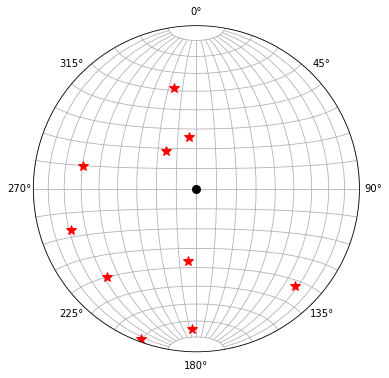

#1


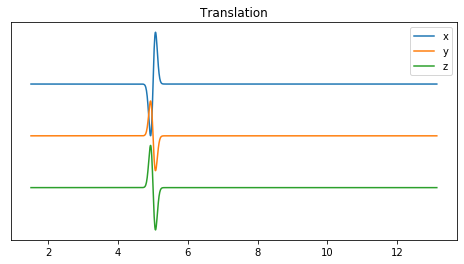

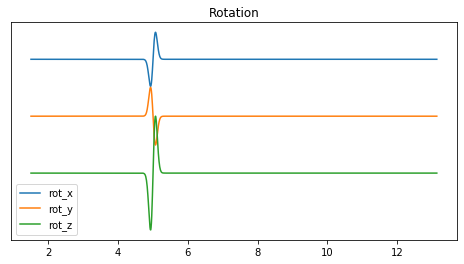

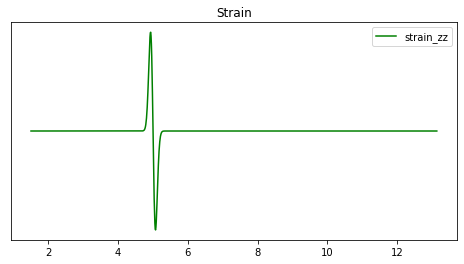

Estimated direction of propagation:
Theta: 60.45256650510344
Phi: 168.48
Actual direction of propagation:
Theta: 60.45256650510344
Phi: 168.48
Error (order of magnitude):
-15.895540114152006
---------------------------------- 
#2
Estimated direction of propagation:
Theta: 24.05828735839355
Phi: 128.51999999999998
Actual direction of propagation:
Theta: 24.05828735839355
Phi: 128.51999999999998
Error (order of magnitude):
-15.906134763686975
---------------------------------- 
#3
Estimated direction of propagation:
Theta: 66.03890500762901
Phi: -135.35999999999996
Actual direction of propagation:
Theta: 66.03890500762897
Phi: -135.36
Error (order of magnitude):
-14.861889528595777
---------------------------------- 
#4
Estimated direction of propagation:
Theta: 73.87696764501862
Phi: -44.640000000000036
Actual direction of propagation:
Theta: 73.87696764501862
Phi: -44.640000000000036
Error (order of magnitude):
-16.255619765854984
---------------------------------- 
#5
Estimated direct

In [6]:
f = 10.
fs = 100.
N = 10
wavetype = 'qP' #'qP','qS1','qS2'

nus, gammas = get_direction('random',C,N)
plot_directions(nus)
r2d = 180/np.pi
for i in range(0,len(nus)):
    vel, v = get_eigenvals(gammas[i], density)
    seis, t = get_seis_one_wavetype(wavetype,v,vel,nus[i],f,fs)
    
    n,_,_ = get_polarizations(seis,'nav')
    
    it = np.argmax(seis[6,:])
    rx = seis[3,it]
    ry = seis[4,it]
    ezz = seis[6,it]
    
    nu_e = np.zeros(3) 
    nu_e[2] = 1.
    nu_e[1] = 2*rx/ezz + n[1]/n[2]
    nu_e[0] = -2*ry/ezz + n[0]/n[2]

    l = 0
    for j in range(0,3):
        l += nu_e[j]**2
    nu_e = nu_e / np.sqrt(l)
    
    print('#'+str(i+1))
    if i==0:
        plot_7C(seis,t)
    theta_e, phi_e = get_angles(nu_e)
    theta, phi = get_angles(nus[i])
    print('Estimated direction of propagation:')
    print('Theta: '+str(theta_e*r2d))
    print('Phi: '+str(phi_e*r2d))
    print('Actual direction of propagation:')
    print('Theta: '+str(theta*r2d))
    print('Phi: '+str(phi*r2d))
    print('Error (order of magnitude):')
    err = np.sqrt((nus[i][0]-nu_e[0])**2+(nus[i][1]-nu_e[1])**2+(nus[i][2]-nu_e[2])**2)
    print(np.log10(err))
    print('---------------------------------- ')
    